In [1]:
# March 2022

# for communication

# twitter https://twitter.com/runaz_there

# Нейронные сети

In [2]:
# ! pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

# Введение

Data Science ассоциируется именно с нейронными сетями и глубоким обучением. Это мнение справедливо, если учитывать, что нейронные сети являются обобщением ранее рассмотренных методов статистического анализа, машинного обучения.

Вот интересная цитата о популярности нейронных сетей. "Вокруг нейронных сетей возникло много шумихи, которая сделала их волшебными и загадочными. Как поясняется в этом разделе, они просто являются нелинейными статистическими моделями, во многом похожими на регрессионную модель...". Это из гл. 11.3 Основ обучения, которую я также буду использовать в описании сетей ниже.

Мотивировка использования нейронных сетей следующая. Линейность не всегда работает. Почему? Потому что линейность предполагает, например, что увеличение данных, то есть x, влечет и увеличение y. Но это не всегда так. Например, более темный пиксель на фотографии в конкретном месте еще не означает, что на картинке кошка, а не собака. Нейронные сети позволяют с этим справится, они вносят как раз нелинейность.

В предельно общем описании: "Вся модель принимает исходные данные (объекты), генерирует выходные данные (прогнозы) и обладает параметрами (объединенными параметрами из всех составляющих слоев). Аналогично, каждый отдельный слой принимает входные данные (предоставляемые предыдущим уровнем), генерирует выходные данные (входные данные для последующего уровня) и обладает набором настраиваемых параметров, которые обновляются в соответствии с сигналом, который поступает обратно с последующего уровня" (из онлайн-учебника ML).

Как будет построена эта глава? Сначала я дам описание нейронных сетей по учебнику Машинное обучение, затем сделаю уточнения по учебнику Основы обучения. После чего рассмотрю пример по официальному руководству TensorFlow, а затем уже применю нейронные сети к данным Goodreads. В Приложении 2 можно найти код для базовых операций с тензорами. 

Объяснение персептрона начну с такого вот рисунка.

![Тензор](./images/tensor1.png 'Тензор')

Описать этот рисунок можно так. Слева находятся зависимые переменные, справа - независимая переменная. Посередине идут: веса, на которые умножаются переменные, затем функция, которая объединяет признаки и веса, а затем пороговая функция, которая и считает вероятный выход. Этот вероятный вывод сравнивается с зависимой переменной, на основании чего производится корректировка весов. 

А вот как это можно описать более формально на пример учебника Машинное обучение:

1. Устанавливаю начальные веса либо равными нулям, либо равными небольшим случайным значениям. Помню, что переменные для каждого наблюдения умножаются на эти веса.

2. Для каждого наблюдения, то есть строки в наборе данных, надо:
1) вычислить выходное значение, то есть умножаю x на веса и смотрю результат;
2) обновляю веса. Для этого использую формулу

![Тензор](./images/tensor2.png 'Тензор')

Индексы здесь обозначают: нижний - столбец, верхний - строку набора данных. Кроме того, первый символ означает скорость обучения, **y** без шляпки - настоящая метка класса, **y** с шляпкой - спрогнозированная метка. На стр. 54 учебника Машинное обучение можно найти пример расчета по формуле.

Минусом простого персептрона является то, что он сходится, только если данные можно идеально разделить. Более продвинутый вариант - это адаптивный линейный нейрон Adaline, где линейная функция активации является просто отображением общего входа. 

Отсюда видно, что персептрон очень напоминают логистическую регрессию. Это хорошо видно на следующем рисунке

![Тензор](./images/tensor3.png 'Тензор')


Теперь непосредственно о нейронных сетях. Нейронная сеть состоит из входного слоя, одного скрытого слоя и одного выходного слоя. Все слои являются полносвязными. Если в сети есть более одного скрытого слоя, тогда такая сеть называется глубокой искусственной нейронной сетью. На каждом слое полученное ранее значение взвешивается и подвергается нелинейному преобразованию. 

Сети можно разделить на сети с прямым распространением ошибки и сети с обратным распространением ошибки. Начну с первых. Прямое распространение предполагает, что каждый слой служит входом для последующего слоя, то есть отсутствуют циклы, которые, в свою очередь, характерны для сетей с обратным распространением. 

Представить многослойную нейронную сеть прямого распространения можно с помощью следующего рисунка из учебника Машинного обучения:


![Тензор](./images/tensor7.png 'Тензор').

Еще один хороший рисунок из Обработки языка:

![Тензор](./images/tensor11.png 'Тензор')

Что тут происходит? Подаю данные на вход. Далее применяю формулу h = sigma(W*x + b), где W - это вес, а b - это смещение, sigma - это сигмоидная функция. 

Для расчета вероятности класса можем применить output = softmax(Ws*h + bs).

Далее, получив вероятность отнесения к метке, можно посчитать ошибку классификации. Затем происходит подбор параметров W, b, Ws и bs, чтобы уменьшить ошибку.

Сравнение сетей прямого и обратного распространения возможно по следующим рисункам:

![Тензор](./images/tensor8.png 'Тензор')

![Тензор](./images/tensor9.png 'Тензор')

Более интуитивное представление о нейронных сетях можно получить с помощью сравнения логистической регрессией например с алгоритмом Adaline. 

В логистичекой регрессии были следующие элементы:

1) линейная функция, которая содержала сумму переменных, умноженных на коэффициенты;

2) функция распределения, через которую настраивались коэффициенты линейной функции;

3) логистическая функция, в которую входила линейная функция с уже настроенными весами и которая позволяла предсказать категорию (1 или 0).

Адаптивный линейный нейрон (Adaline) содержит следующие элементы:

1) входные значения, то есть просто переменные по каждому наблюдению. Если представить линейную функцию, то входными значениями будут иксы;

2) входные значения умножаются на весовые коэффициенты и передаются в функцию общего входа. Так получается линейная функция;

3) затем применяется функция активации. В логистической регрессии на этом месте стоит функция распределения. То есть надо передать линейную функцию в другую функцию, которая позволяет настраивать коэффициенты;

4) далее единичная ступенчатая функция. В логистической регрессии на этом месте стоит логистическая функция, то есть такая функция, которая должна выдать результат - предсказанный класс.

В данной главе я использую TensorFlow для построения нейронных сетей. Общее введение в тензоры и граф вычислений можно найти в гл. 2 учебника Обработка языка.

Этапы применения нейронной сети следующие:

1) сначала задаю обработку данных и слои нейронной сети;

2) затем компилирую, задаю способ оптимизации, метрики;

3) обучаю;

4) делаю предсказания.


Важнейшие понятия машинного обучения и нейронных сетей.

1. Инициализация модели, параметров. Это задание функции, начальных значений весов для независимыех переменных, смещения. Как пример, задание весов и смещения в линейной регрессии. В случае, если используется вероятностный подход (например, логистическая регрессия), формула линейной регрессии дополнительно "помещается" в функцию, которая расчитывает вероятность, например softmax.

2. Функция активации. Понятие для нейронных сетей. В каждом слое применяется линейное преобразование, например функция линейной регрессии. Эта функция "оборачивается" нелинейной функцией. Например, функцией активации, в которую "помещается" линейная функция, будет ReLU, сигмоидная, тангенциальная функция. Задача указанных функций в том, чтобы на них можно было с большей эффективностью вычислять минимумы.

3. Функция потерь. Это функция, которая измеряет разницу между фактическим значением зависимой переменной и значением зависимой переменной, которое было спрогнозировано моделью машинного обучения. В обычной линейной регрессии функцией потерь может быть среднеквадратичная ошибка, в логистической регрессии фукнция потерь будет основана на методе максимального правдоподобия. Здесь может быть применена регуляризации, когда к значению потери прибавляется дополнительный (штрафной) член, а задача минимизации значения потери становится задачей минимизации потери плюс штрафа.

4. Методы оптимизации (градиентный спуск и т.д.). Это способ нахождения минимума функции потерь за счет обновления параметров модели.

5. Обучение модели. Это процесс, который начинается с инициализации параметров, продолжается прогнозированием значения зависимой переменной, расчетом функции потерь, а затем применением выбранного метода оптимизации. 

Ниже указанные идеи показаны на примере из [гл. 4.7. Forward Propagation, Backward Propagation, and Computational Graphs](https://d2l.ai/chapter_multilayer-perceptrons/backprop.html) онлайн-учебника ML.

Инициализация модели, параметров, линейная функция:

![Машинное обучение](./images/ml1.png 'Машинное обучение')

Нелинейная функция активации:

![Машинное обучение](./images/ml2.png 'Машинное обучение')

Прогнозируемое значение для функции потерь:

![Машинное обучение](./images/ml3.png 'Машинное обучение')

Функция потерь:

![Машинное обучение](./images/ml4.png 'Машинное обучение')

Штрафной член:

![Машинное обучение](./images/ml5.png 'Машинное обучение')

Потери и штрафной член, сумма которых подлежит оптимизации:

![Машинное обучение](./images/ml6.png 'Машинное обучение')


Дополнительные замечания:

1. См. также про рекуррентные сети стр. 667-716 учебника Машинное обучение. Про состязательные сети см. стр. 733, про сети с подкреплением см. стр. 783-786 того же учебника.

2. Из учебника Машинное обучение, стр. 631: "Небольшие сети, или сети, имеющие относительное малое число параметров, обладают низкой емкостью, а потому вероятно будут недообучаться, в результате демонстрируя плохую эффективность, поскольку они не могут выявлять внутреннюю структуру сложных наборов данных. Тем не менее, очень крупные сети подвержены переобучению, то есть сеть просто запоминает обучающие данные и работает исключительно хорошо на обучающем наборе, но показывает низкую эффективность на удерживаемом испытательном наборе. Имея дело с реальными задачами МО, мы не знаем заранее, насколько крупной должна быть сеть".

3. Представить градиентный спуск можно по следующему рисунку

![Тензор](./images/tensor4.png 'Тензор')

Обновление весов с применением градиентного спуска осуществляется по формуле:

![Тензор](./images/tensor5.png 'Тензор')

4. Внутри скрытых слоев часто отдается предпочтение гиперболическому тангенсу, а не сигмоидальной функции активации.

5. Что понимается под тензором в рамках машинного обучения можно понять по следующему рисунку из учебника Машинное обучение:

![Тензор](./images/tensor6.png 'Тензор')

6. Пример расчета производной функции активации можно найти на стр. 495-499 учебника Машинное обучение.

7. Для применения нейронных сетей строго рекомендуется использование масштабирования.

8. Интересное описание нейронных сетей можно также найти в гл. 11.3, 11.4 учебника Основы обучения. Операции свертки см. стр. 63 Обработка языка, оптимизация - стр. 65 того же графика. Сверточные сети объясняются на стр. 133, 136 и далее, рекурентные сети - гл. 6, сети с долгой краткосрочной памятью - гл. 7 того же учебника. 

9. На рисунке ниже показаны виды нейронных сетей (стр. 33 Обработка языка)

![Тензор](./images/tensor10.png 'Тензор')

10. Для нелинейной активации часто используют сигмоиду или ReLU.

11. Подробнее про реализацию линейной регрессии с помощью tensorflow см. [3.2. Linear Regression Implementation from Scratch](https://d2l.ai/chapter_linear-networks/linear-regression-scratch.html) и [3.3. Concise Implementation of Linear Regression](https://d2l.ai/chapter_linear-networks/linear-regression-concise.html). Про отличие прямого и обратного распространения см. [4.7. Forward Propagation, Backward Propagation, and Computational Graphs](https://d2l.ai/chapter_multilayer-perceptrons/backprop.html)

12. Технически обработка нейронных сетей может быть представлена с помощью графа вычислений. Ниже привожу пример такого графа из [4.7. Forward Propagation, Backward Propagation, and Computational Graphs](https://d2l.ai/chapter_multilayer-perceptrons/backprop.html), где также объяснен смысла графа.

![Машинное обучение](./images/ml7.png 'Машинное обучение')

13. Проблема инициализации весов, выбор изначальных параметров см. [4.8. Numerical Stability and Initialization](https://d2l.ai/chapter_multilayer-perceptrons/numerical-stability-and-init.html). Объяснение того, как работает TensorFlow, в том числе, как он работает "под капотом", как самостоятельно создать слой, как использовать видеокарту для ускорения вычислений, можно найти в [гл. 5](https://d2l.ai/chapter_deep-learning-computation/index.html) онлайн-учебника ML

# Пример из официального руководства TensorFlow

Пример для этого раздела взят из официального учебника [отсюда](https://www.tensorflow.org/tutorials/keras/classification).

In [4]:
# загрузка данных
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t',
                        sep=' ', skipinitialspace=True)

In [5]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
# удаляю пропуски
dataset = dataset.dropna()

In [7]:
# кодирую категориальные данные
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [8]:
# делю данные на тренировочные и тестовые
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

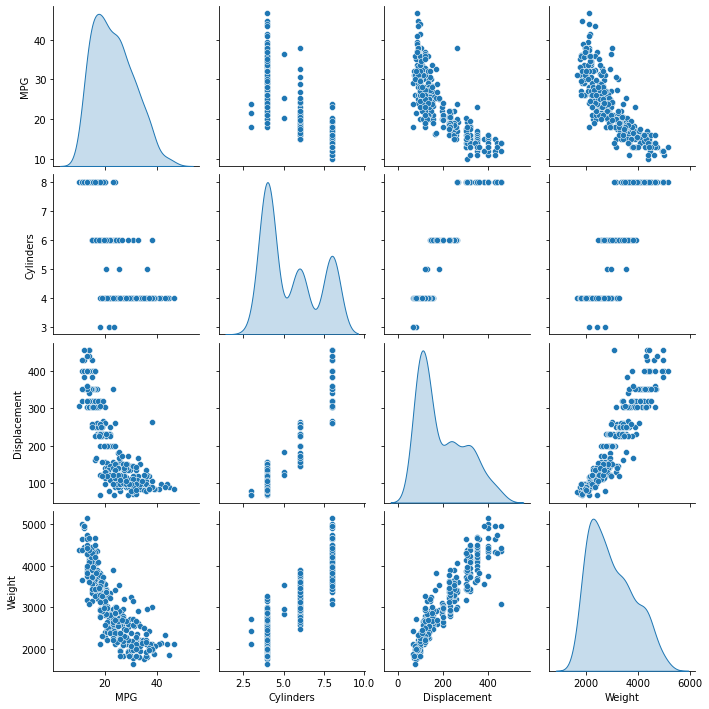

In [9]:
# посмотрю распределение и взаимосвязи переменных
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [10]:
# вывод с учетом категории
train_dataset.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [11]:
# делю на признаки и целевой признак
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

# Подготовка данных

In [12]:
# масштабирование данных

normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [13]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


# Создание модели

In [14]:
# нормализация
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

В том случае, если надо провести регрессию между зависимой переменной и несколькими независимыми переменными, а не одной как здесь, нормализацию надо применять ко всем признакам.

In [15]:
# создание слоев
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [16]:
horsepower_model.predict(horsepower[:10])

array([[-1.1776127],
       [-0.6650834],
       [ 2.17354  ],
       [-1.6507165],
       [-1.4930152],
       [-0.5862327],
       [-1.7689924],
       [-1.4930152],
       [-0.3891061],
       [-0.6650834]], dtype=float32)

In [17]:
# компиляция модели
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

На этапе компиляции надо указать:

1) как оптимизировать модель;

2) какую функцию потерь использовать;

3) какую метрику использовать для оценки модели.

# Обучение модели

In [18]:
history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.803445,4.191393,95
96,3.804167,4.192064,96
97,3.803166,4.187889,97
98,3.801967,4.191164,98
99,3.806329,4.169028,99


In [20]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

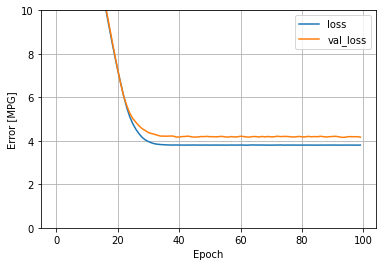

In [21]:
plot_loss(history)

In [22]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0
)

# Прогнозы модели

In [23]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [24]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

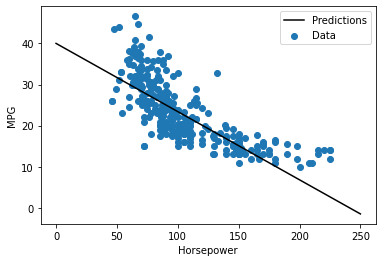

In [25]:
plot_horsepower(x,y)

# Обучение со скрытыми слоями

In [26]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [27]:
# для одного независимого признака
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [28]:
dnn_horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 64)                128       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [29]:
history = dnn_horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

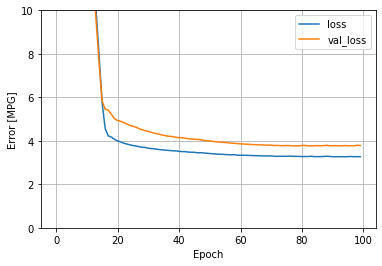

In [30]:
plot_loss(history)

In [31]:
# предсказание
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

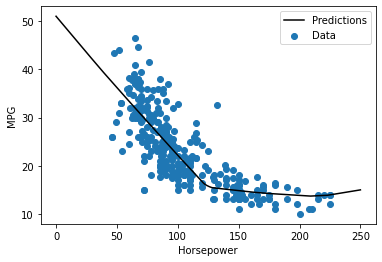

In [32]:
plot_horsepower(x, y)

Скрытые слои позволяют учитывать нелинейность, что видно на графике.

In [33]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

In [34]:
# для всех признаков
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 64)                640       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [35]:
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

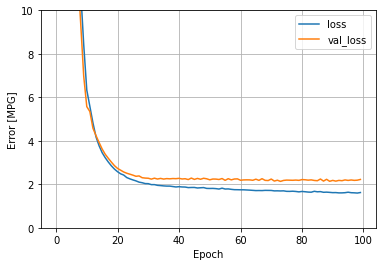

In [36]:
plot_loss(history)

In [37]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

# Инспектирование модели

In [38]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.646078
dnn_horsepower_model,2.921467
dnn_model,1.631726


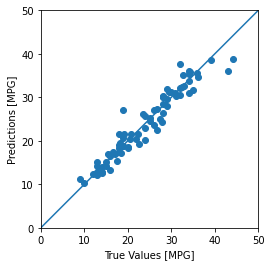

In [39]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

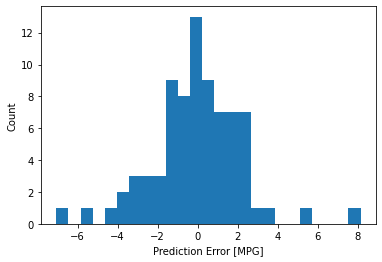

In [40]:
# оценка распределения ошибок
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [41]:
# сохранение модели
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


# Данные Goodreads

In [42]:
data = pd.read_csv(os.getcwd() + '\\gd_augmentation.csv', 
    dtype = {'decade':'object','quarter':'object', 'tra_co':'object', 'multivolume':'object'}) 

In [43]:
db = data.copy()
db = db[['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'len_title', 'polarity', 'subjectivity']]
db.head(3)

,average_rating,num_pages,ratings_count,text_reviews_count,len_title,polarity,subjectivity
0,4.57,652,2095690,27591,39,-0.166667,0.166667
1,4.49,870,2153167,29221,42,0.000000,0.000000
2,4.42,352,6333,244,40,0.000000,0.000000


In [44]:
X = db.drop('average_rating', axis=1)
y = db['average_rating']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1) 

Вначале c помощью нейронной сети предскажу среднюю оценку по количеству страниц. Затем добавлю оставшиеся признаки.

# Подготовка данных

In [46]:
aver_rat = np.array(X_train['num_pages'])

In [47]:
aver_rat_norm = preprocessing.Normalization(input_shape=[1,], axis=None)

In [48]:
aver_rat_norm.adapt(aver_rat)
aver_rat_norm

# Создание модели

In [49]:
# создаю слои
aver_model = tf.keras.Sequential([
    aver_rat_norm,
    layers.Dense(units=1)
])

aver_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [50]:
# компиляция
aver_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

# Обучение модели

In [51]:
history = aver_model.fit(

    X_train['num_pages'], y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2

)

# Оценка результатов

In [52]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.226675,0.238213,95
96,0.226575,0.233697,96
97,0.225855,0.245840,97
98,0.224559,0.241751,98
99,0.225998,0.230658,99


# Обучение на всем наборе

## Подготовка данных

In [53]:
X = db.drop('average_rating', axis=1)
y = db['average_rating']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size=0.7, random_state=1) 

normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train1))

# Создание слоев

In [54]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

# Компиляция

In [55]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# Обучение

In [56]:
history = linear_model.fit(
    X_train1, y_train1, 
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [57]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.251145,0.286035,95
96,0.246716,0.246759,96
97,0.249399,0.251870,97
98,0.246175,0.249187,98
99,0.247057,0.284178,99


# Сеть со скрытыми слоями

In [58]:
X = db.drop('average_rating', axis=1)
y = db['average_rating']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=0.7, random_state=1) 

In [59]:
"""
Function to compile the model
"""

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [60]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 64)                448       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,686
Trainable params: 4,673
Non-trainable params: 13
_________________________________________________________________


In [61]:
history = dnn_model.fit(
    X_train2, y_train2,
    validation_split=0.2,
    verbose=0, epochs=100)

In [62]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.210009,0.218827,95
96,0.208646,0.230649,96
97,0.209281,0.221730,97
98,0.209658,0.233762,98
99,0.213172,0.224891,99


In [63]:
# проверка на тестовом наборе

test_results['dnn_model'] = dnn_model.evaluate(X_test2, y_test2, verbose=0)

In [64]:
test_results['dnn_model']

0.2171260565519333

# Приложение 1

**Рекомендуемая литература:**

1) Себастьян Рашка, Вахид Мирджалили. Машинное обучение. 3-е издание (обязательно именно третье, не второе и не третье)
2) Орельен Жерон. Прикладное машинное обучение
3)  Тревор Хасти, Роберт Тибширани, Джером Фридман Основы статистического обучения (по тексту - учебник Основы обучения)
4) С. Рашка, В. Мирджалили Python и машинное обучение
5) Тушан Ганегедара Обработка естественного языка с TensorFlow (по тексту - Обработка языка)
6) [Dive into deep learning](https://d2l.ai/chapter_preface/index.html) (по тексту - онлайн учебник ML)

**Полезные ссылки:**

1) руководство по применению регулярных выражений [здесь](https://developers.google.com/edu/python/regular-expressions);
2) еще одно руководство по регулярным выражениям от проекта [Dataquest](https://www.dataquest.io/blog/regular-expressions-data-scientists/);
3) и еще немного про регулярные выражения от [Towards Data Science](https://towardsdatascience.com/easiest-way-to-remember-regular-expressions-regex-178ba518bebd);
3) математическая энциклопедия от проекта [Wolfram](https://mathworld.wolfram.com/).

**Ссылки на мои ресурсы:**

1) Twitter https://twitter.com/runaz_there
2) GitHub https://github.com/Ruslan-Nazarov
3) AI for everyone (Medium) https://medium.com/ai-for-everyone
4) LinkedIn https://www.linkedin.com/in/ruslan-nazarov-223003198/
5) email runaz2007@gmail.com OR runaz@protonmail.com

# Приложение 2 Базовые операции с тензорами

In [65]:
# тензор ранга 0
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [66]:
# тензор ранга 1
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


In [67]:
# сложение тензоров
a = tf.constant([[1, 2], [3,4]])
b = tf.constant([[1, 1], [1, 1]])

print(tf.add(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 



In [68]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])
print(tf.reduce_max(c))

tf.Tensor(10.0, shape=(), dtype=float32)


In [69]:
rank_4_tensor = tf.zeros([3, 2, 4,5])
rank_4_tensor

<tf.Tensor: shape=(3, 2, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

Здесь в [3, 2, 4, 5] каждый элемент - это размер оси, всего осей 4, поэтому ранг тензора равен 4. В этом тензоре по вертикали 3 блока. Каждый блок в 2 строки и 4 стобца. Глубина кажого блока равна 5. 

In [70]:
# описание тензора ранга 4
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


In [71]:
x1 = tf.constant([[1], [2], [3]])
print("Type of every element:", x1.dtype)
print("Number of axes:", x1.ndim)
print("Shape of tensor:", x1.shape)
print("Elements along axis 0 of tensor:", x1.shape[0])
print("Elements along the last axis of tensor:", x1.shape[-1])
print("Total number of elements: ", tf.size(x1).numpy())

Type of every element: <dtype: 'int32'>
Number of axes: 2
Shape of tensor: (3, 1)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 1
Total number of elements:  3


# Приложение 3 Загрузка по мини-батчам

Использование мини-батчей важно, так как, например, градиетный спуск на всем наборе данных, если это большой набор, будет выполняться долго. Но если разбить данные на "кусочки", выполнять спуск на таких кусочках и подстраивать модель, то это будет более эффективным. 

Ниже показан пример кода для обработки мини-батчей, взятый из [онлайн-учебника ML](https://d2l.ai/chapter_preface/index.html).

In [72]:
data = pd.read_csv(os.getcwd() + '\\gd_augmentation.csv', 
    dtype = {'decade':'object','quarter':'object', 'tra_co':'object', 'multivolume':'object'}) 

features = data[['num_pages', 'ratings_count']]
labels = data[['average_rating']]

#features = features.to_numpy()
#labels = labels.to_numpy()

In [73]:
"""
Function for mini-batches with random selection of rows.
"""

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [74]:
# пример отбора мини-батча
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[  320    63]
 [  384  2633]
 [ 1369   607]
 [  288   397]
 [  291   229]
 [  336    76]
 [  192    91]
 [  480    15]
 [  356 24862]
 [  192    23]], shape=(10, 2), dtype=int64) 
 tf.Tensor(
[[3.38]
 [4.35]
 [4.33]
 [3.63]
 [3.77]
 [3.48]
 [4.27]
 [3.94]
 [4.24]
 [2.83]], shape=(10, 1), dtype=float64)
